In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
##Get data
df = pd.read_csv("Games_sales2021.csv")
df.head(10)

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14
5,/games/boxart/full_call-of-duty-modern-warfare...,Call of Duty: Modern Warfare 3,X360,Shooter,Activision,Infinity Ward,8.7,14.82,9.07,0.13,4.29,1.33,2011-11-08,NaN
6,/games/boxart/full_call-of-duty-black-ops_5Ame...,Call of Duty: Black Ops,X360,Shooter,Activision,Treyarch,8.8,14.74,9.76,0.11,3.73,1.14,2010-11-09,NaN
7,/games/boxart/full_4653215AmericaFrontccc.jpg,Red Dead Redemption 2,PS4,Action-Adventure,Rockstar Games,Rockstar Games,9.8,13.94,5.26,0.21,6.21,2.26,2018-10-26,2018-11-02
8,/games/boxart/full_1977964AmericaFrontccc.jpg,Call of Duty: Black Ops II,X360,Shooter,Activision,Treyarch,8.4,13.86,8.27,0.07,4.32,1.20,2012-11-13,2018-04-07
9,/games/boxart/full_4649679AmericaFrontccc.png,Call of Duty: Black Ops II,PS3,Shooter,Activision,Treyarch,8.0,13.80,4.99,0.65,5.88,2.28,2012-11-13,2018-04-07


In [4]:
##Checking columns
df.columns

Index(['img', 'title', 'console', 'genre', 'publisher', 'developer',
       'critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales',
       'other_sales', 'release_date', 'last_update'],
      dtype='object')

In [5]:
##Size of dataset
df.size

896224

In [6]:
##Getting all columns with nan values
df.isna().sum()

img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64

In [7]:
##Droping unnecessary columns
df = df.drop(["img", "last_update"], axis=1)

In [8]:
df.head()

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06


In [9]:
##Adding new column with release year
df["release_year"] = df["release_date"].str.split("-").str.get(0)
df["release_year"]

0        2013
1        2014
2        2002
3        2013
4        2015
         ... 
64011    2016
64012    2020
64013    2020
64014    2019
64015     NaN
Name: release_year, Length: 64016, dtype: object

In [10]:
##Drop release date
df = df.drop("release_date", axis=1)
df

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_year
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
64011,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,2016
64012,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020
64013,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020
64014,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [11]:
##Removing all info about games on consoles with low popularity
df["console"].unique()
df[df["console"].isin(['PS3', 'PS4', 'PS2', 'X360', 'XOne', 'PC', 'PSP', 'Wii', 'PS','PSN', 'WiiU','Linux'])]

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_year
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
64008,Without Within 3,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,2018
64010,World End Syndrome,PS4,Visual Novel,Arc System Works,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,2018
64011,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,2016
64012,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020


In [12]:
##Set critic score for GTA V on X360
df.at[3, "critic_score"] = 9.4
df

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_year
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,9.4,15.86,9.06,0.06,5.33,1.42,2013
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
64011,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,2016
64012,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020
64013,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020
64014,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [13]:
##Removing all visual novels 
mask = df["genre"]=="Visual Novel"
df = df[~mask]
df

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_year
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,9.4,15.86,9.06,0.06,5.33,1.42,2013
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
63736,Yu-Gi-Oh! Master Duel,PS4,Strategy,Unknown,Konami,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63737,Yu-Gi-Oh! Master Duel,PC,Strategy,Unknown,Konami,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63738,Yu-Gi-Oh! Master Duel,XS,Strategy,Unknown,Konami,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63739,Yu-Gi-Oh! Master Duel,XOne,Strategy,Unknown,Konami,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
##Removing all nan values from dataset
df = df.dropna()
df.size

14532

In [15]:
##Reseting indexes
df = df.reset_index()
df = df.drop("index", axis=1)
df

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_year
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,9.4,15.86,9.06,0.06,5.33,1.42,2013
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
1206,Virtua Striker 2002,GC,Sports,Sega,Amusement Vision,6.6,0.05,0.01,0.03,0.00,0.00,2002
1207,GrimGrimoire,PS2,Strategy,NIS America,Vanillaware,7.7,0.05,0.01,0.03,0.01,0.00,2007
1208,Metal Gear Solid: Digital Graphic Novel,PSP,Misc,Konami,Kojima Productions,7.6,0.04,0.02,0.02,0.00,0.00,2006
1209,Gotcha Force,GC,Shooter,Capcom,Capcom,5.8,0.03,0.01,0.01,0.00,0.00,2003


In [16]:
studios = df.groupby(by="genre")["total_sales"].sum().sort_values(ascending=False).head(10)
studios

genre
Shooter             460.97
Action              386.99
Sports              247.92
Role-Playing        182.95
Racing              151.93
Fighting             79.25
Platform             71.04
Action-Adventure     60.45
Misc                 56.31
Adventure            54.52
Name: total_sales, dtype: float64

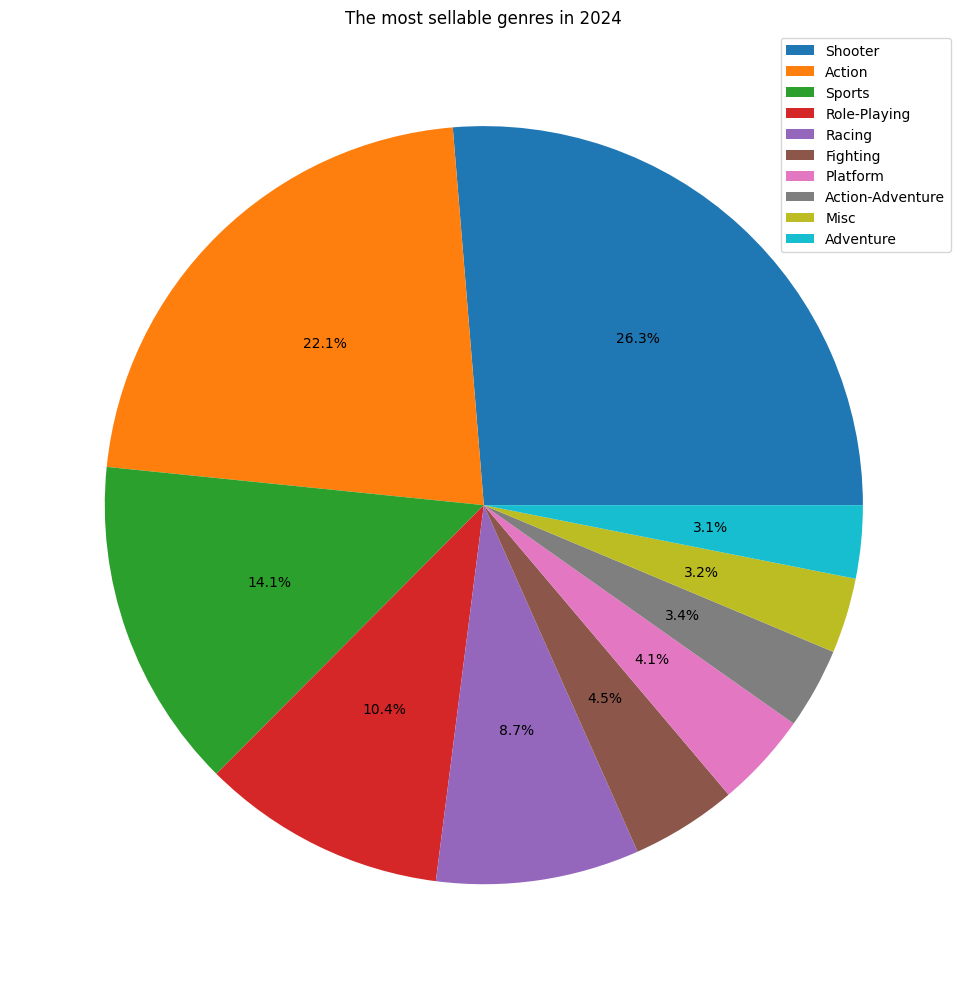

In [17]:
##Most popular genres
plot = plt.figure(figsize=(12,10))
plt.title("The most sellable genres in 2024")
plt.pie(studios, autopct='%1.1f%%')
plt.legend(studios.index)
plt.tight_layout()
plt.show()

In [18]:
##Choosing the data
platform = df.groupby("console")["total_sales"].agg("sum").sort_values(ascending=False).head(10)
platform

console
PS3     450.68
X360    446.12
PS4     245.19
PS2     231.15
PS       93.04
PSP      69.34
Wii      60.42
DS       59.75
XOne     39.39
3DS      30.20
Name: total_sales, dtype: float64

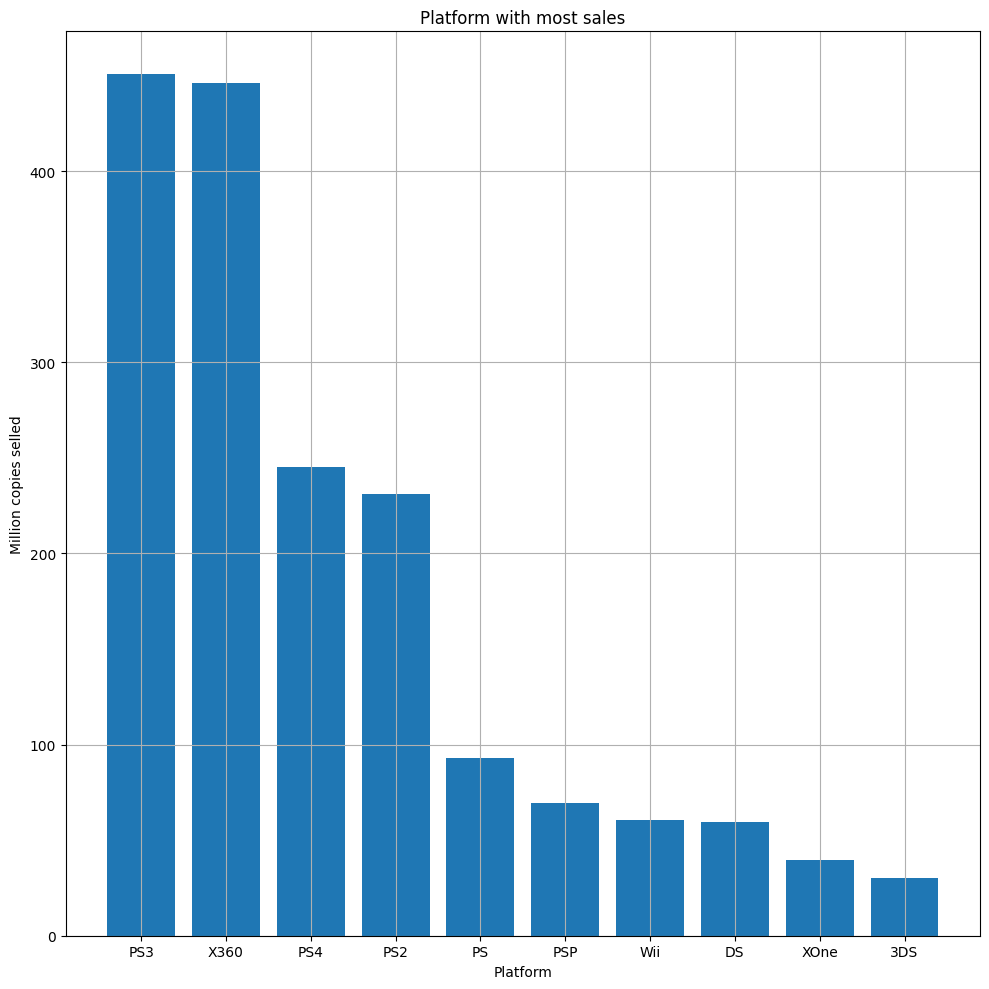

In [19]:
##The most popular platforms
plt.figure(figsize=(10,10))
plt.title("Platform with most sales")
plt.bar(platform.index, platform.values)
plt.xlabel("Platform")
plt.ylabel("Million copies selled")
plt.grid()
plt.tight_layout()
plt.show()

In [20]:
sales_by_region = df[["na_sales", "jp_sales", "pal_sales", "other_sales"]].sum().sort_values(ascending=False)
sales_by_region = sales_by_region.rename({"na_sales":"North America", "jp_sales":"Japan", "pal_sales":"Eu+Africa", "other_sales":"other regions"})
sales_by_region

North America    844.49
Eu+Africa        640.25
other regions    216.89
Japan            128.94
dtype: float64

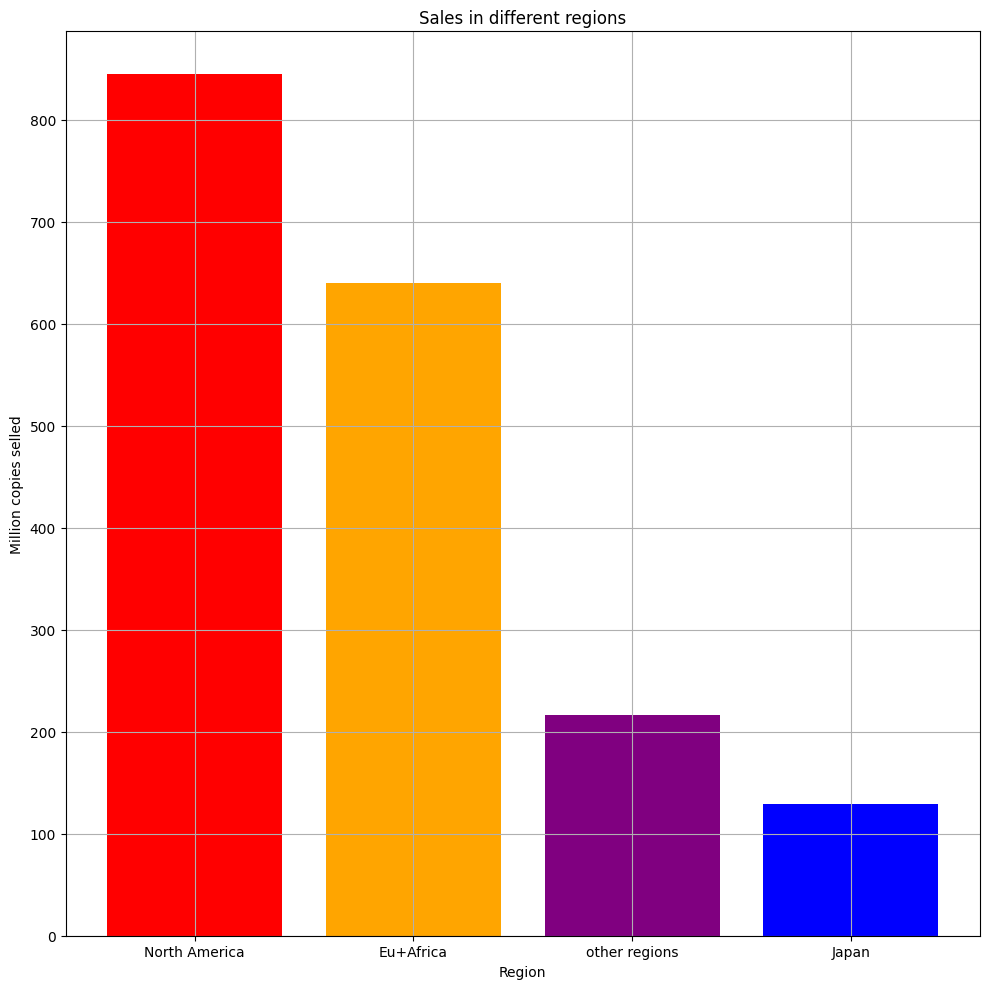

In [21]:
##Sales in all regions
plt.figure(figsize=(10,10))
plt.title("Sales in different regions")
plt.bar(sales_by_region.index, sales_by_region.values, color=["red", "orange", "purple", "blue"])
plt.xlabel("Region")
plt.ylabel("Million copies selled")
plt.grid()
plt.tight_layout()
plt.show()

In [49]:
##Correlation of different parameters
##correlation = df[["na_sales", "pal_sales", "jp_sales","total_sales", "critic_score"]]
correlation = df[["na_sales", "pal_sales", "jp_sales","total_sales", "critic_score"]]
correlation.corr()

,na_sales,pal_sales,jp_sales,total_sales,critic_score
na_sales,1.000000,0.726636,0.111326,0.919019,0.361145
pal_sales,0.726636,1.000000,0.221777,0.929689,0.318030
jp_sales,0.111326,0.221777,1.000000,0.258096,0.146920
total_sales,0.919019,0.929689,0.258096,1.000000,0.371258
critic_score,0.361145,0.318030,0.146920,0.371258,1.000000


<AxesSubplot: >

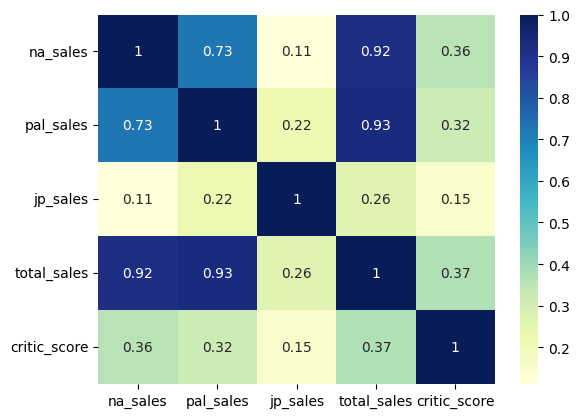

In [50]:
##Heatmap of dataset correlation
sns.heatmap(correlation.corr(), annot=True, cmap="YlGnBu")